In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("./insurance.csv")

# EDA

## Phase 1: The First Look

In [33]:
print(df.head())
print(df.shape)
print(df.info())

# Do the column names make sense? Does the data in the rows look correct?

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [34]:
# What are the min/max values (for spotting outliers)? Are the mean and median (50%) far apart (which indicates skew)?

print(df.describe())

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


In [35]:
print(f"Total duplicated rows: {df.duplicated().sum()}")

# df = df.drop_duplicates()

Total duplicated rows: 1


## Phase 2: Univariate Analysis (One Variable at a Time)

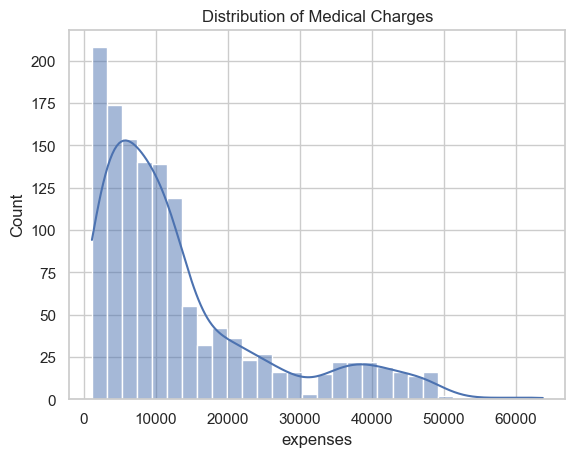

In [36]:
# What is the shape of this data? Is it symmetric (a "normal" bell curve)? Is it skewed? Does it have one peak (unimodal) or multiple peaks (multimodal)?
sns.histplot(df['expenses'], kde=True, bins=30)
plt.title('Distribution of Medical Charges')
plt.show()

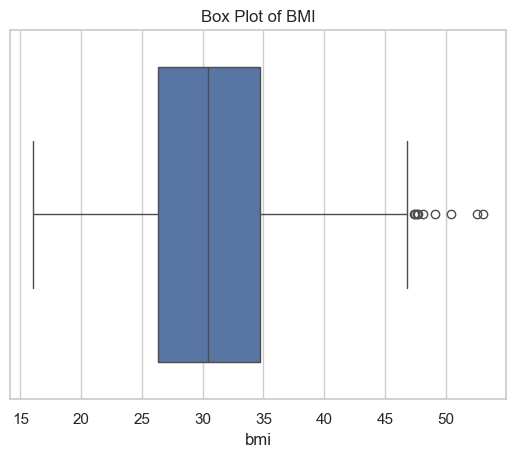

In [37]:
# Are there data points far outside the "whiskers"? These are outliers.
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.show()

In [38]:
# Are the classes balanced (e.g., 50/50 smokers/non-smokers) or imbalanced (e.g., 90/10)?

print(df['smoker'].value_counts())

print(df['smoker'].value_counts(normalize=True))

smoker
no     1064
yes     274
Name: count, dtype: int64
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


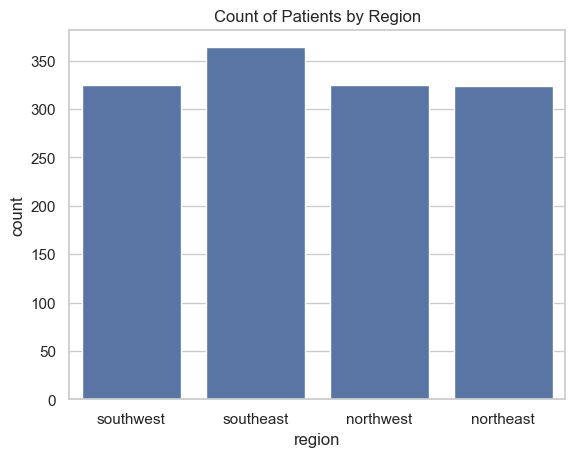

In [39]:
sns.countplot(x=df['region'])
plt.title('Count of Patients by Region')
plt.show()

## Phase 3: Bivariate Analysis (Two Variables at a Time)

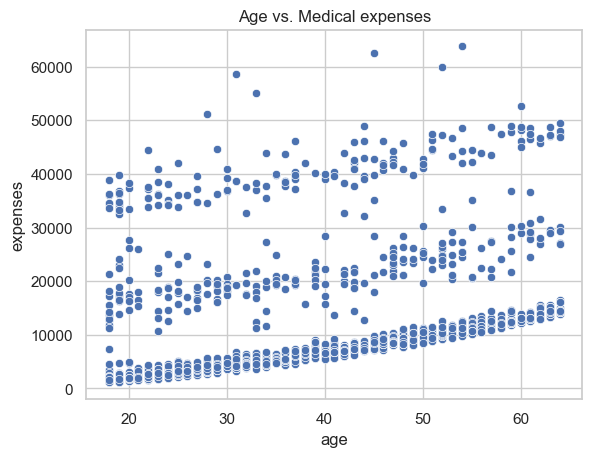

In [40]:
# Is there a relationship? Is it linear (a straight line)? Is it positive (goes up) or negative (goes down)?
sns.scatterplot(x=df['age'], y=df['expenses'])
plt.title('Age vs. Medical expenses')
plt.show()

In [41]:
print(df['age'].corr(df['expenses']))

0.29900819228508274


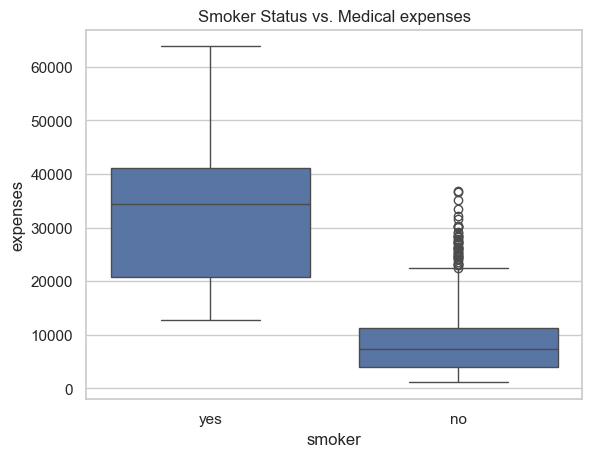

In [42]:
# Does the distribution of the numerical variable change for each category?
sns.boxplot(x=df['smoker'], y=df['expenses'])
plt.title('Smoker Status vs. Medical expenses')
plt.show()

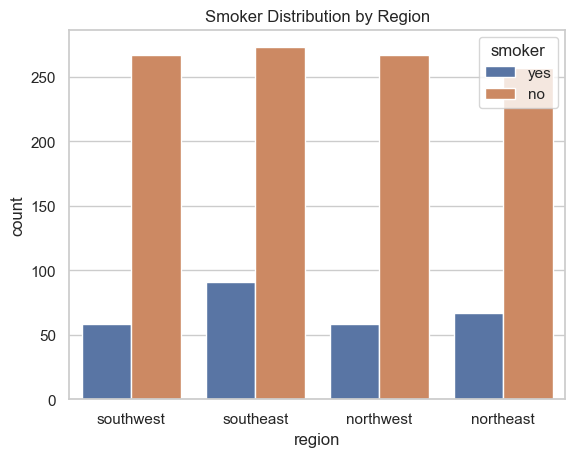

In [43]:
sns.countplot(x=df['region'], hue=df['smoker'])
plt.title('Smoker Distribution by Region')
plt.show()

## Phase 4: Multivariate Analysis (3+ Variables)

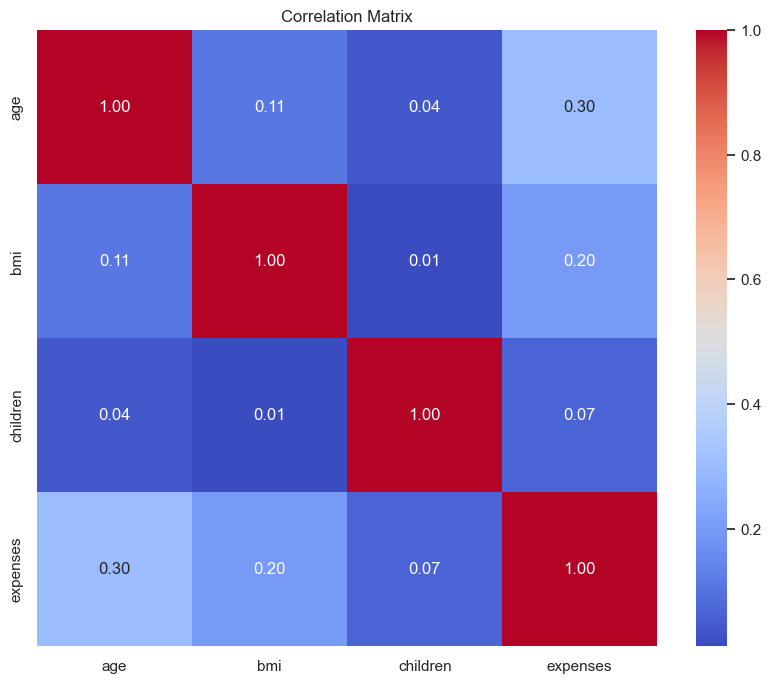

In [44]:
# Which features are most correlated with the target (expenses)? Are any of your features highly correlated with each other (this is multicollinearity and can be a problem)?

numerical_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

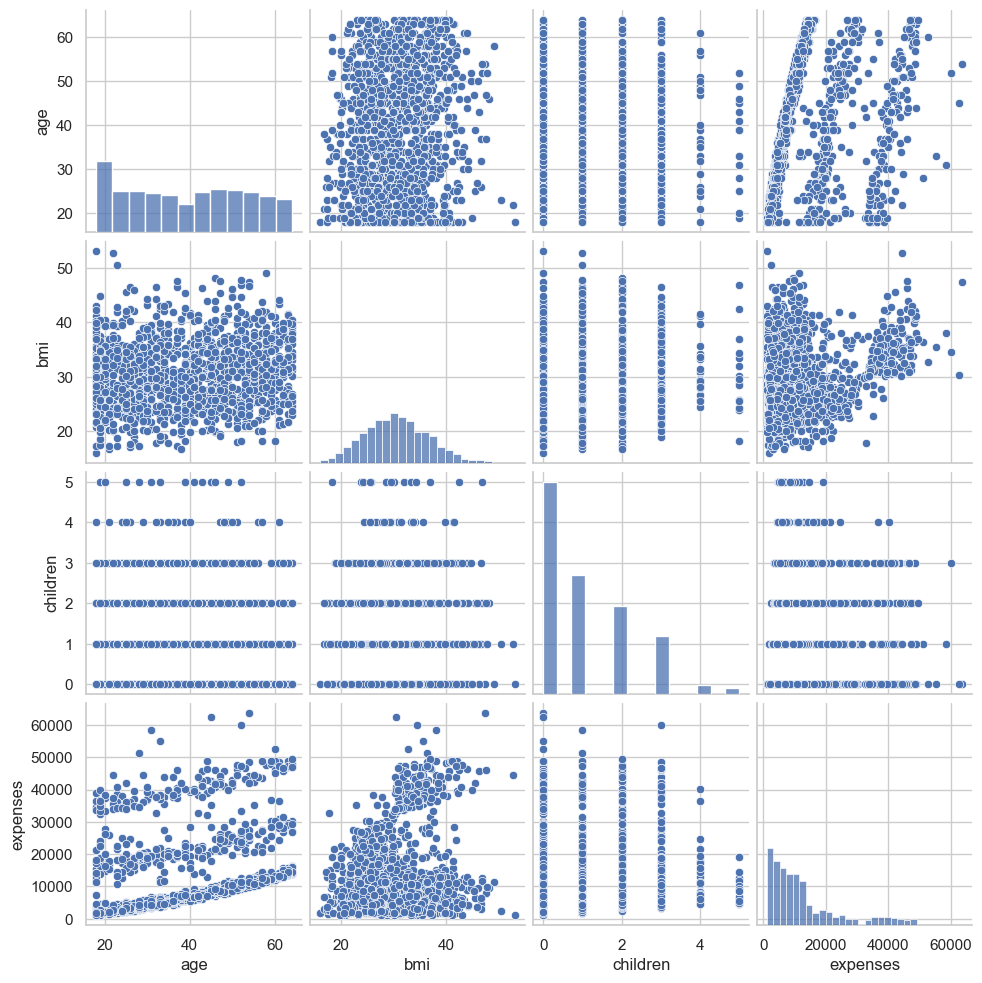

In [45]:
sns.pairplot(df)
plt.show()

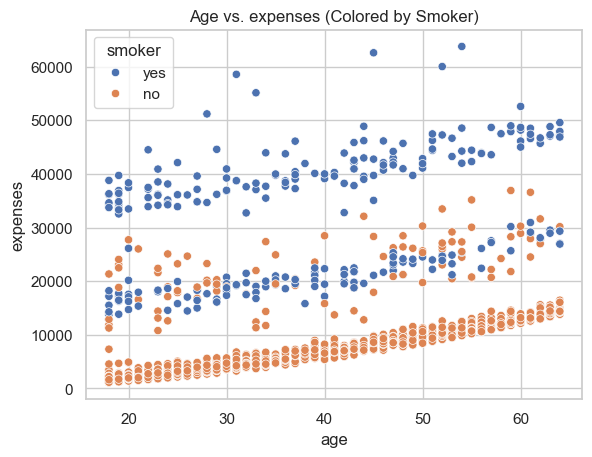

In [46]:
# Does the relationship between age and expenses depend on whether the person is a smoker? (This is an interaction effect).

sns.scatterplot(x=df['age'], y=df['expenses'], hue=df['smoker'])
plt.title('Age vs. expenses (Colored by Smoker)')
plt.show()

## Phase 5: Summarize Findings & Plan Action

In [47]:
"""
Goal: Turn your insights into a concrete plan for preprocessing and feature engineering.

Example Findings Summary:

    Target: expenses is heavily right-skewed.

    Missing Data: The dataset is clean, no missing values to impute.

    Categorical: sex, smoker, and region all need to be one-hot encoded.

    Key Predictors: smoker is the strongest predictor by far. age and bmi are also positively correlated with expenses.

    Interactions: The effect of age on expenses is much stronger for smokers.

Resulting Action Plan:

    Preprocessing: Log-transform expenses (i.e., df['log_expenses'] = np.log(df['expenses'])) and use this new column as your target y.

    Preprocessing: One-hot encode sex, smoker, and region.

    Feature Engineering: Create an interaction term, such as age * smoker_status or bmi * smoker_status, 
    as these relationships are clearly not simple.

    Model Selection: Since the smoker effect is so strong, a simple LinearRegression will likely do well, 
    but a DecisionTree or RandomForest will be able to capture the non-linear interactions automatically."""

"\nGoal: Turn your insights into a concrete plan for preprocessing and feature engineering.\n\nExample Findings Summary:\n\n    Target: expenses is heavily right-skewed.\n\n    Missing Data: The dataset is clean, no missing values to impute.\n\n    Categorical: sex, smoker, and region all need to be one-hot encoded.\n\n    Key Predictors: smoker is the strongest predictor by far. age and bmi are also positively correlated with expenses.\n\n    Interactions: The effect of age on expenses is much stronger for smokers.\n\nResulting Action Plan:\n\n    Preprocessing: Log-transform expenses (i.e., df['log_expenses'] = np.log(df['expenses'])) and use this new column as your target y.\n\n    Preprocessing: One-hot encode sex, smoker, and region.\n\n    Feature Engineering: Create an interaction term, such as age * smoker_status or bmi * smoker_status, \n    as these relationships are clearly not simple.\n\n    Model Selection: Since the smoker effect is so strong, a simple LinearRegression wi

# Preprocessing

In [48]:
"""
Dropping: Remove the entire row or column if it has missing data. This is okay if you have a huge dataset and only a few missing rows, 
but it's generally wasteful.

Imputation: Fill in the missing values. This is the preferred method.

    Numerical: Fill with the mean or median (median is better if the data is skewed).

    Categorical: Fill with the mode (the most frequent category).
"""
print(df.isnull().sum())

from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df['bmi'] = num_imputer.fit_transform(df[['bmi']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['region']] = cat_imputer.fit_transform(df[['region']])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [49]:
"""
We use One-Hot Encoding. This technique creates new binary (0 or 1) columns for each category.

sex: "male", "female" → Becomes sex_male (1 if male, 0 if female).

smoker: "yes", "no" → Becomes smoker_yes (1 if smoker, 0 if not).

After running this, your sex column is gone, replaced by sex_male. Your smoker column is gone, replaced by smoker_yes. 
Your region column is gone, replaced by region_northwest, 
region_southeast, and region_southwest. (The fourth one, northeast, is represented when all the others are 0).
"""
df_processed = df.copy()

df_processed = pd.get_dummies(df_processed, 
                              columns=['sex', 'smoker', 'region'], 
                              drop_first=True)

print(df_processed.head())

   age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
0   19  27.9         0  16884.92     False        True             False   
1   18  33.8         1   1725.55      True       False             False   
2   28  33.0         3   4449.46      True       False             False   
3   33  22.7         0  21984.47      True       False              True   
4   32  28.9         0   3866.86      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


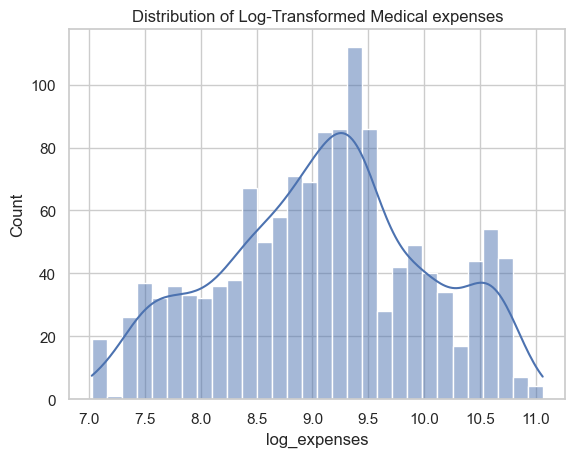

In [50]:

df_processed['log_expenses'] = np.log(df_processed['expenses'])

df_processed = df_processed.drop('expenses', axis=1)

sns.histplot(df_processed['log_expenses'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Medical expenses')
plt.show()

# When you make predictions later, they will be in "log-dollars," 
# so you must transform them back using np.exp() to get the actual dollar amount.

In [51]:
y = df_processed['log_expenses']

X = df_processed.drop('log_expenses', axis=1)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     
    random_state=42
)

print(f"Training set shape (X): {X_train.shape}")
print(f"Testing set shape (X): {X_test.shape}")

Training set shape (X): (1070, 8)
Testing set shape (X): (268, 8)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['age', 'bmi', 'children']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.describe())

                age           bmi      children
count  1.070000e+03  1.070000e+03  1.070000e+03
mean  -1.992176e-16  1.776357e-16 -2.324205e-17
std    1.000468e+00  1.000468e+00  1.000468e+00
min   -1.518194e+00 -2.410776e+00 -9.111921e-01
25%   -8.784157e-01 -7.221574e-01 -9.111921e-01
50%    1.016470e-02 -5.995415e-02 -8.842793e-02
75%    8.276587e-01  6.519144e-01  7.343363e-01
max    1.751782e+00  3.731160e+00  3.202629e+00


# Modeling

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [55]:

print("\n--- Model Parameters ---")
print(f"Intercept (b): {model.intercept_:.4f}")

coefficients = pd.DataFrame(
    data=model.coef_, 
    index=X.columns, 
    columns=['Coefficient']
)

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
print("\nModel Coefficients (w):")
print(coefficients.sort_values(by='Abs_Coefficient', ascending=False))


--- Model Parameters ---
Intercept (b): 8.9121

Model Coefficients (w):
                  Coefficient  Abs_Coefficient
smoker_yes           1.551663         1.551663
age                  0.481745         0.481745
region_southeast    -0.136032         0.136032
region_southwest    -0.122506         0.122506
children             0.112380         0.112380
bmi                  0.082088         0.082088
sex_male            -0.074343         0.074343
region_northwest    -0.056394         0.056394


In [56]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("\n✅ Predictions made on train and test data.")


✅ Predictions made on train and test data.


In [57]:
print("\n--- Model Evaluation ---")
print("Test Set Performance:")

r2_test = r2_score(y_test, y_pred_test)
print(f"  R-squared (R²): {r2_test:.4f}")

y_test_orig = np.exp(y_test)
y_pred_test_orig = np.exp(y_pred_test)

mae_test = mean_absolute_error(y_test_orig, y_pred_test_orig)
print(f"  Mean Absolute Error (MAE): ${mae_test:,.2f}")

rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_orig))
print(f"  Root Mean Squared Error (RMSE): ${rmse_test:,.2f}")

print("\nTrain Set Performance (for comparison):")

r2_train = r2_score(y_train, y_pred_train)
print(f"  R-squared (R²): {r2_train:.4f}")

y_train_orig = np.exp(y_train)
y_pred_train_orig = np.exp(y_pred_train)
mae_train = mean_absolute_error(y_train_orig, y_pred_train_orig)
print(f"  Mean Absolute Error (MAE): ${mae_train:,.2f}")


--- Model Evaluation ---
Test Set Performance:
  R-squared (R²): 0.8047
  Mean Absolute Error (MAE): $3,888.51
  Root Mean Squared Error (RMSE): $7,815.19

Train Set Performance (for comparison):
  R-squared (R²): 0.7572
  Mean Absolute Error (MAE): $4,270.77


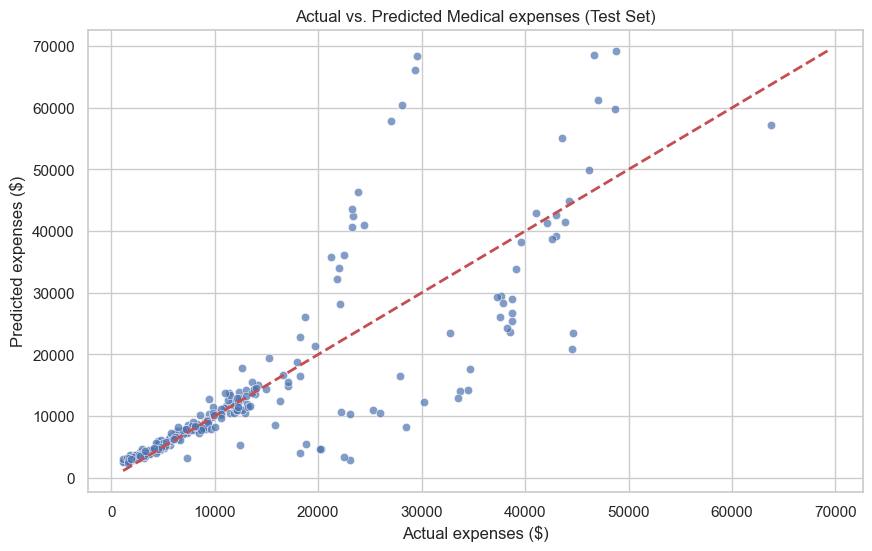

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_orig, y=y_pred_test_orig, alpha=0.7)

min_val = min(y_test_orig.min(), y_pred_test_orig.min())
max_val = max(y_test_orig.max(), y_pred_test_orig.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel("Actual expenses ($)")
plt.ylabel("Predicted expenses ($)")
plt.title("Actual vs. Predicted Medical expenses (Test Set)")
plt.show()

# Improving The Model

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

def evaluate_model(model_name, model, X_test, y_test):
    """
    Makes predictions and prints evaluation metrics (R², MAE, RMSE).
    Handles the inverse transform (np.exp) for error metrics.
    """
    print(f"--- Evaluating Model: {model_name} ---")
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(f"  R-squared (R²): {r2:.4f}")
    
    y_test_orig = np.exp(y_test)
    y_pred_orig = np.exp(y_pred)
    
    mae = mean_absolute_error(y_test_orig, y_pred_orig)
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    
    print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}\n")
    
    return r2, mae, rmse

In [60]:
model_performance = {}

baseline_pipe = Pipeline([
    ('model', LinearRegression())
])
baseline_pipe.fit(X_train, y_train)
r2, mae, rmse = evaluate_model("Baseline Linear Regression", baseline_pipe, X_test, y_test)
model_performance['Baseline_Linear'] = (r2, mae)

--- Evaluating Model: Baseline Linear Regression ---
  R-squared (R²): 0.8047
  Mean Absolute Error (MAE): $3,888.51
  Root Mean Squared Error (RMSE): $7,815.19



In [61]:
print("Building Ridge (L2) Regularization Model...")

ridge_pipe = Pipeline([
    ('model', Ridge(alpha=1.0))  # alpha=1.0 is a common default to start with. A higher alpha = a stronger penalty / simpler model.
])

ridge_pipe.fit(X_train, y_train)

r2, mae, rmse = evaluate_model("Ridge Regression (L2)", ridge_pipe, X_test, y_test)
model_performance['Ridge_L2'] = (r2, mae)

Building Ridge (L2) Regularization Model...
--- Evaluating Model: Ridge Regression (L2) ---
  R-squared (R²): 0.8046
  Mean Absolute Error (MAE): $3,878.82
  Root Mean Squared Error (RMSE): $7,761.21



In [62]:
print("Building Lasso (L1) Regularization Model...")

lasso_pipe = Pipeline([
    ('model', Lasso(alpha=0.01))
])

lasso_pipe.fit(X_train, y_train)

r2, mae, rmse = evaluate_model("Lasso Regression (L1)", lasso_pipe, X_test, y_test)
model_performance['Lasso_L1'] = (r2, mae)

lasso_coefs = lasso_pipe.named_steps['model'].coef_

coef_df = pd.DataFrame(
    data=lasso_coefs, 
    index=X_train.columns, 
    columns=['Coefficient']
)

print("Lasso Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

Building Lasso (L1) Regularization Model...
--- Evaluating Model: Lasso Regression (L1) ---
  R-squared (R²): 0.7970
  Mean Absolute Error (MAE): $3,860.77
  Root Mean Squared Error (RMSE): $7,460.56

Lasso Coefficients:
                  Coefficient
smoker_yes           1.485754
children             0.086160
age                  0.034207
bmi                  0.011492
region_northwest     0.000000
region_southwest    -0.010601
region_southeast    -0.018552
sex_male            -0.028526


In [63]:
print("Building Polynomial Regression Model...")

poly_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)), # 'degree=2' is standard. degree=3 or higher will likely overfit.
    ('model', LinearRegression())
])

poly_pipe.fit(X_train, y_train)

r2, mae, rmse = evaluate_model("Polynomial Regression (Degree 2)", poly_pipe, X_test, y_test)
model_performance['Polynomial_D2'] = (r2, mae)

Building Polynomial Regression Model...
--- Evaluating Model: Polynomial Regression (Degree 2) ---
  R-squared (R²): 0.8645
  Mean Absolute Error (MAE): $2,405.28
  Root Mean Squared Error (RMSE): $4,748.48



In [64]:
print("Building Polynomial + Ridge Regression Model...")

poly_ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge(alpha=10.0)) # We use a stronger alpha to control the many new features
])

poly_ridge_pipe.fit(X_train, y_train)

r2, mae, rmse = evaluate_model("Polynomial (D2) + Ridge (alpha=10)", poly_ridge_pipe, X_test, y_test)
model_performance['Poly_Ridge'] = (r2, mae)

Building Polynomial + Ridge Regression Model...
--- Evaluating Model: Polynomial (D2) + Ridge (alpha=10) ---
  R-squared (R²): 0.8623
  Mean Absolute Error (MAE): $2,574.82
  Root Mean Squared Error (RMSE): $5,369.36



In [65]:
print("--- Final Model Comparison ---")

results_df = pd.DataFrame.from_dict(
    model_performance, 
    orient='index', 
    columns=['R_squared', 'Mean_Absolute_Error']
)

print(results_df.sort_values(by='R_squared', ascending=False))

--- Final Model Comparison ---
                 R_squared  Mean_Absolute_Error
Polynomial_D2     0.864494          2405.284336
Poly_Ridge        0.862325          2574.820888
Baseline_Linear   0.804730          3888.509694
Ridge_L2          0.804625          3878.823306
Lasso_L1          0.797028          3860.768402
